In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

PyTorch Workflow
1. Prepare and load data
2. Build the model
3. Training
4. Making predictions and evaluating the model
5. Saving and loading a model
6. Putting it all together

# Prepare and load data

In [2]:
#create known parameters
weight=0.7
bias=0.3
#create some data
start=0
end=1
step=0.02
X=torch.arange(start,end,step)
X=X.unsqueeze(dim=1)
y=weight*X + bias
X.shape,y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [3]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]


In [4]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))

  #training data
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training Data')
  #testing data
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing Data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
  plt.legend()

# Build the model

In [5]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.tensor)->torch.tensor:
    return self.bias+self.weights*x


In [6]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
model_0.state_dict()#dict of parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions

In [8]:
with torch.inference_mode():
  y_preds=model_0(X_test)



In [9]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

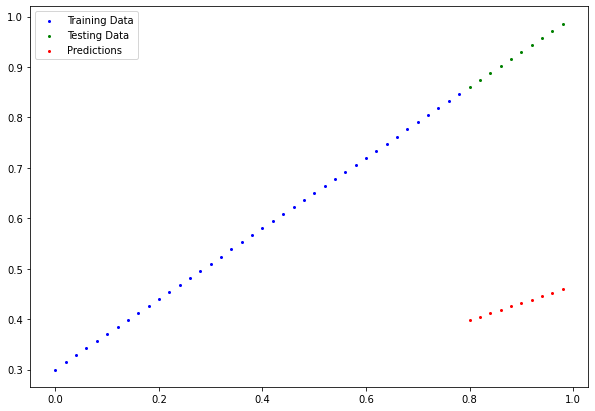

In [10]:
plot_predictions(predictions=y_preds)

# Train the model

In [11]:
#Set up our loss function
loss_fn=nn.L1Loss()
#set up optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

Things needed in a training loop
1. Loop through the data
2. Forward Pass (moves through `forward` funciton in the model definition)
3. Calculate loss(compare forward pass preds to ground truth labels)
4. Optimizer zero grad
5. Loss backward - backprop to calculate gradients of parameters wrt to loss
6. Optimizer step - gradient descent


In [12]:
# with torch.inference_mode():
#   print(list(model_0.parameters()))
# list(model_0.eval().parameters())

In [13]:
#Training loop(and testing loop)
epoch_count,loss_values,test_loss_values=[],[],[]

epochs=200#a loop through the data
for epoch in range(epochs):
  epoch_count.append(epoch)
  #set model to training mode
  model_0.train()#train mode in sets requires_grad=True for all params of the model that have the attribute
  #Forward Pass
  y_pred=model_0(X_train)
  #Calculate the loss
  loss=loss_fn(y_pred,y_train)
  loss_values.append(loss.detach())
  #Zero the optimizer's gradients
  optimizer.zero_grad()
  #Backprop
  loss.backward()
  #Gradient Descent
  optimizer.step()

  #testing loop
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)
    test_loss_values.append(test_loss.detach())
  if epoch%10==0:
    print(f"Epoch : {epoch}, Train loss : {loss}, Testing loss : {test_loss}")
    print(model_0.state_dict())



Epoch : 0, Train loss : 0.31288138031959534, Testing loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10, Train loss : 0.1976713240146637, Testing loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20, Train loss : 0.08908725529909134, Testing loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30, Train loss : 0.053148526698350906, Testing loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40, Train loss : 0.04543796554207802, Testing loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50, Train loss : 0.04167863354086876, Testing loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60, Train loss : 0.03818932920694351, Testing loss : 0.088866330683231

In [14]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

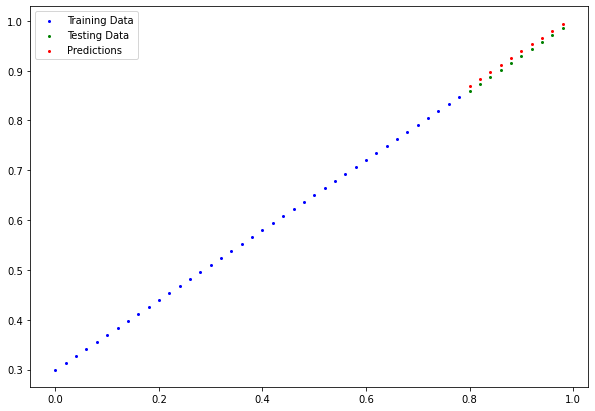

In [15]:
plot_predictions(predictions=y_preds_new.detach())

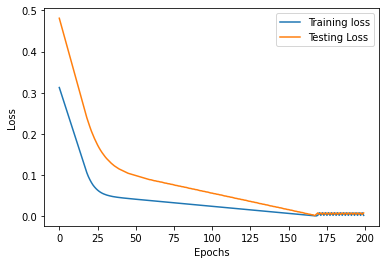

In [16]:
plt.plot(epoch_count,loss_values,label='Training loss')
plt.plot(epoch_count,test_loss_values,label='Testing Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Saving a model

1. `torch.save()` (pickle)
2. `torch.load()`
3. `torch.nn.Module.load_state_dict()`

In [17]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_0.pt"
#create the model save path
model_save_path=model_path/model_name
model_save_path

PosixPath('models/01_pytorch_workflow_model_0.pt')

In [18]:
#save model state_dict
torch.save(model_0.state_dict(),model_save_path)

In [19]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Dec  8 08:03 01_pytorch_workflow_model_0.pt


In [20]:
#load a model
loaded_model_0=LinearRegressionModel()
# loaded_model_0
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [21]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds == y_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [23]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#Put it all together

In [24]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cuda


In [25]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)#size of each input and output sample
  def forward(self,x):
    return self.linear_layer(x)
  
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [26]:
next(model_1.parameters()).device


device(type='cpu')

In [27]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [28]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [29]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [30]:
epochs=200
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  model_1_preds=model_1(X_train)
  loss=loss_fn(model_1_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_preds=model_1(X_test)
    test_loss=loss_fn(test_preds,y_test)
  if epoch%10==0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss} ")


Epoch : 0 | Loss : 0.5551779866218567 | Test Loss : 0.5739762187004089 
Epoch : 10 | Loss : 0.439968079328537 | Test Loss : 0.4392664134502411 
Epoch : 20 | Loss : 0.3247582018375397 | Test Loss : 0.30455657839775085 
Epoch : 30 | Loss : 0.20954833924770355 | Test Loss : 0.16984669864177704 
Epoch : 40 | Loss : 0.09433845430612564 | Test Loss : 0.03513690456748009 
Epoch : 50 | Loss : 0.023886388167738914 | Test Loss : 0.04784907028079033 
Epoch : 60 | Loss : 0.019956795498728752 | Test Loss : 0.045803118497133255 
Epoch : 70 | Loss : 0.016517987474799156 | Test Loss : 0.037530567497015 
Epoch : 80 | Loss : 0.013089174404740334 | Test Loss : 0.02994490973651409 
Epoch : 90 | Loss : 0.009653178043663502 | Test Loss : 0.02167237363755703 
Epoch : 100 | Loss : 0.006215683650225401 | Test Loss : 0.014086711220443249 
Epoch : 110 | Loss : 0.00278724217787385 | Test Loss : 0.005814164876937866 
Epoch : 120 | Loss : 0.0012645035749301314 | Test Loss : 0.013801801018416882 
Epoch : 130 | Loss 

In [31]:
test_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

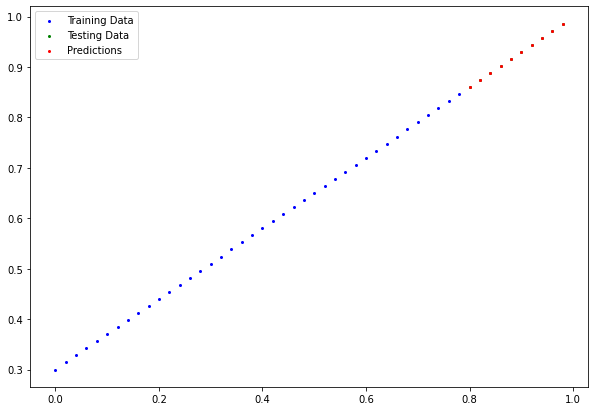

In [32]:
plot_predictions(predictions=test_preds.cpu().numpy())

In [33]:
from pathlib import Path
model_path=Path('models')
model_path.mkdir(parents=True,exist_ok=True)

model_name="01_pytorch_workflow_model_1.pt"
model_save_path=model_path/model_name


In [34]:
torch.save(f=model_save_path,obj=model_1.state_dict())

In [35]:
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [36]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [37]:
model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [38]:
next(loaded_model_1.parameters()).device

device(type='cpu')

#Exercises

In [54]:
weight=0.3
bias=0.9
X=torch.arange(0,1,0.01).unsqueeze(dim=1)
X.shape

torch.Size([100, 1])

In [55]:
len(X)

100

In [56]:
y=weight*X + bias
y.shape

torch.Size([100, 1])

In [57]:
train_split=int(0.8*len(X))
X_train,X_test=X[:train_split],X[train_split:]
y_train,y_test=y[:train_split],y[train_split:]
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train : torch.Size([80, 1]), X_test : torch.Size([20, 1]), y_train : torch.Size([80, 1]), y_test : torch.Size([20, 1])


In [58]:
def plot_predictions(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,label='Training Data',s=4)
  plt.scatter(X_test,y_test,label='Testing Data',s=4)
  if predictions!=None:
    plt.scatter(X_test,predictions)
  plt.legend()


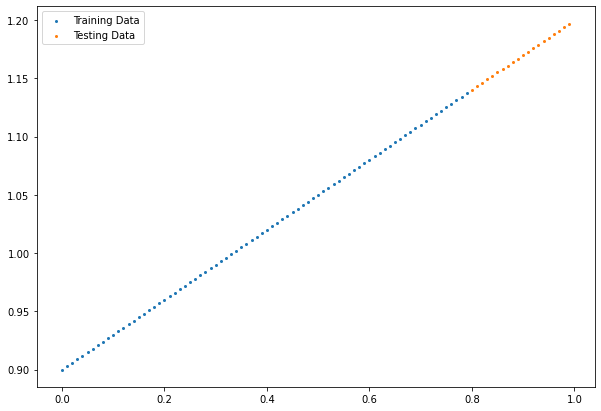

In [59]:
plot_predictions()

In [60]:
class CustomLinRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,x):
    return self.weights*x + self.bias
  

In [62]:
class CustomLinRegModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(1,1)
  def forward(self,x):
    return self.linear_layer(x)
    

In [61]:
model_2=CustomLinRegModel()
model_2.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [63]:
model_3=CustomLinRegModelV2()
model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
             ('linear_layer.bias', tensor([-0.7336]))])

In [ ]:
loss_fn=nn.L1Loss()
optimizer_model_2=torch.optim.Adam(model_2.parameters(),lr=0.01)
optimizer_model_3=torch.optim.Adam(model_3.parameters(),lr=0.01)

